In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

%matplotlib inline
%reload_ext autoreload

# Plot

In [22]:
def load_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    lines = lines[1:]
    timesteps = []
    mean_rewards = []
    best_mean_rewards = []
    for i in range(0, len(lines), 6):
        timestep = int(lines[i].strip().split(' ')[-1]) // 10000
        mean_reward = float(lines[i + 1].strip().split(' ')[-1])
        best_mean_reward = lines[i + 2].strip().split(' ')[-1]
        best_mean_reward = -21.0 if best_mean_reward == "-inf" else float(best_mean_reward)
        
        timesteps.append(timestep)
        mean_rewards.append(mean_reward)
        best_mean_rewards.append(best_mean_reward)
    return timesteps, mean_rewards, best_mean_rewards

def plot(data, labels=["best mean reward", "mean reward"]):
    timesteps, plot_datas = data[0], data[1:]
    #plt.plot(timesteps, mean_rewards)
    plt.xlabel('Timestep(*10000)')
    plt.ylabel('reward')
    for d, l in zip(plot_datas, labels):
        plt.plot(timesteps, d, label=l)
    plt.legend()
    plt.grid()
    
    plt.show()

# Result of different hyperparameters

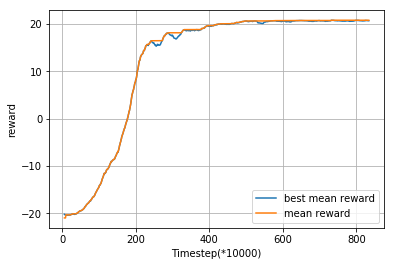

In [23]:
# Default parameter result data
data = load_data('pong_default_parameter.txt')
plot(data)

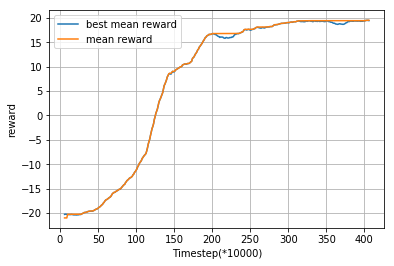

In [24]:
# Double batch size result data
data_bz_128 = load_data('pong_bz_128.txt')
plot(data_bz_128)

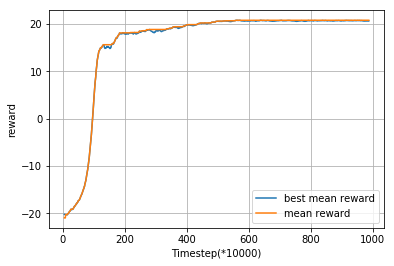

In [30]:
# target network update every 1000 iteration
data_target_update_1000 = load_data('pong_target_update_1000.txt')
plot(data_target_update_1000)

In [ ]:
# 

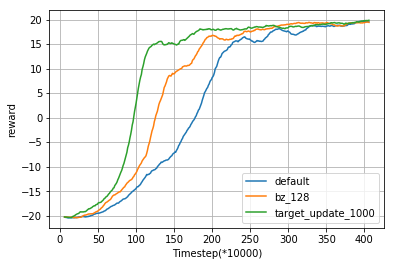

In [32]:
# Plot different result in the same picture
timestep_len = len(data_bz_128[0])
all_data = (data_bz_128[0], data[1][:timestep_len], data_bz_128[1][:timestep_len], data_target_update_1000[1][:timestep_len])
plot(all_data, labels=["default", "bz_128", "target_update_1000"])